# 3_データの可視化
- ここでは、前章のような統計量でのデータ把握ではなく、可視化でのデータ把握を試みます
- Pythonでのデータ可視化にはmatplotlibというライブラリがよく使われます

# （事前情報）ライブラリの説明：matplotlib

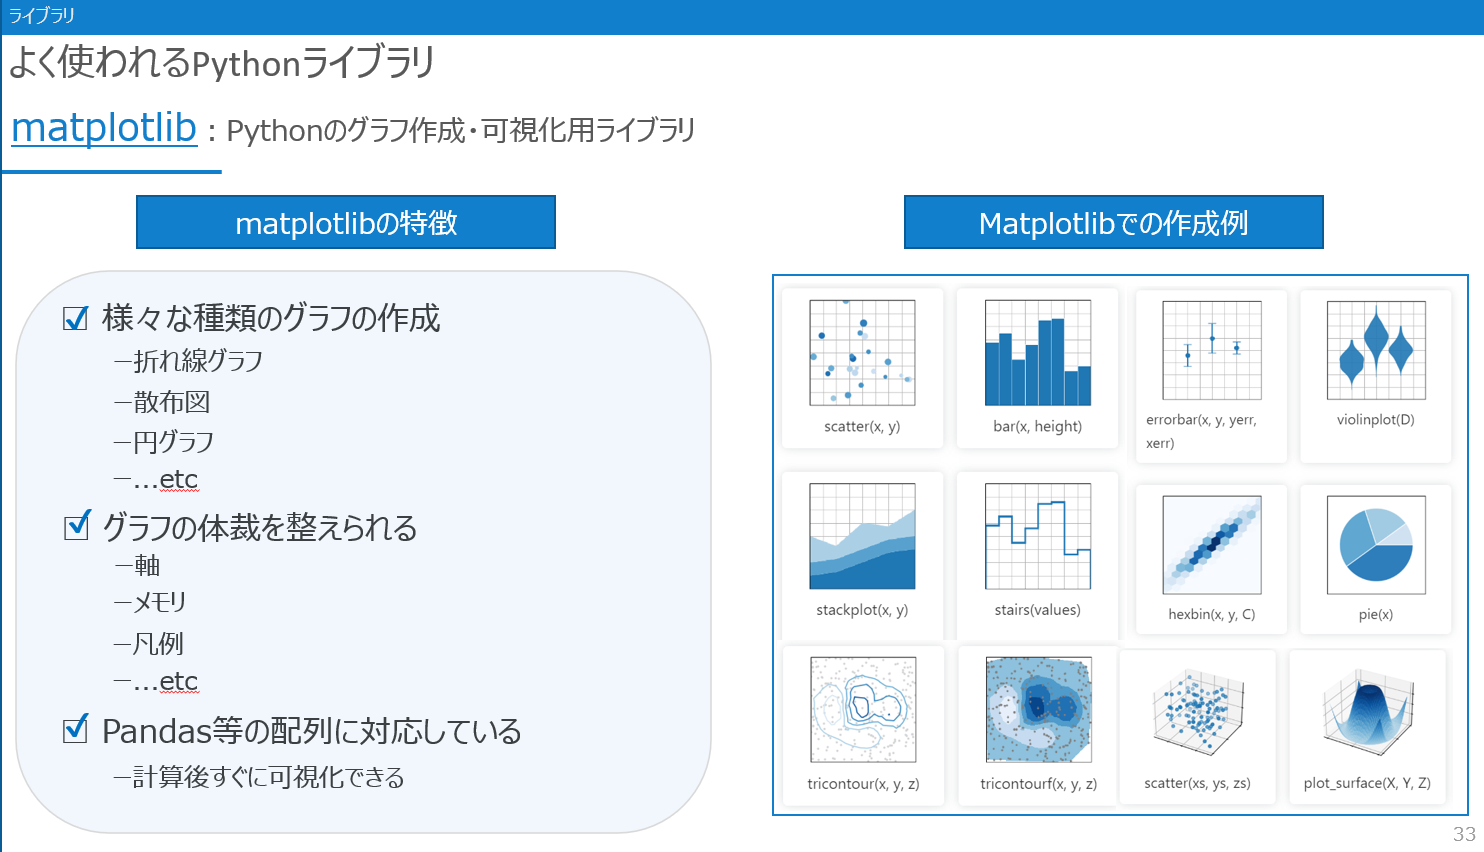

## ■写経

### ライブラリインポート（前章までに加えて、matplotlibも追加）
- 表形式データを簡単に扱うためのPandasと可視化のためのmatplotlibをプログラムにインポートします。インポートすることでPandasとmatplotlibの機能が有効化されます

In [1]:
import pandas as pd
from matplotlib import pyplot as plt  # matplotlibは多機能であるため、一部機能のみ有効化
# matplotlibをnotebook上のインラインに表示するためのコマンド
%matplotlib inline

### データ読み込み（前章と同じ）
- Pandasの機能を使い、"train.csv"というデータをPythonコードで読み込み、Dataframeオブジェクトとして扱います

In [2]:
train = pd.read_csv("train.csv")

### データを見てみる（前章と同じ）
- head関数をつかって、先頭5行分のデータをダイジェスト表示します

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### ヒストグラムの描画
- Survivedに対してヒストグラムを描画し、生存者と死亡者の割合を視覚的に理解します

<Axes: ylabel='Frequency'>

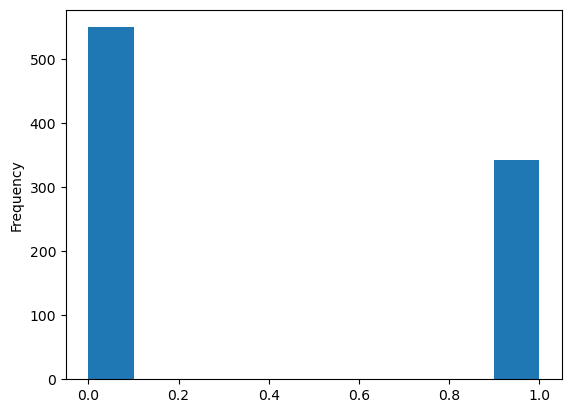

In [4]:
train["Survived"].plot.hist()

### ヒストグラムの装飾
- グラフの大きさやタイトル等、様々な装飾が可能です
- 自分がデータを確認するだけなら上のような表現でよいが、他人に見せる場合は軸ラベルや凡例等がないと不親切ですよね

<Axes: ylabel='Frequency'>

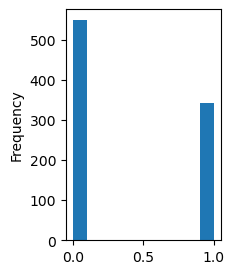

In [5]:
# グラフサイズの指定 figsize = (横サイズ, 縦サイズ)
train["Survived"].plot.hist(figsize =(2,3))

<Axes: title={'center': 'No-survived vs Survived'}, ylabel='Frequency'>

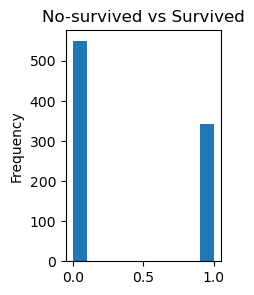

In [6]:
# タイトルもつける title="タイトル"（サイズ指定は上を引継ぎ）
train["Survived"].plot.hist(figsize =(2,3), title="No-survived vs Survived")

<Axes: title={'center': 'No-survived vs Survived'}, ylabel='Frequency'>

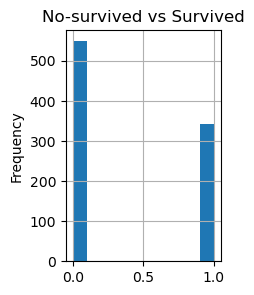

In [7]:
# グリッドをひいてみる
train["Survived"].plot.hist(figsize =(2,3), title="No-survived vs Survived", grid=True)

Text(0, 0.5, 'Count')

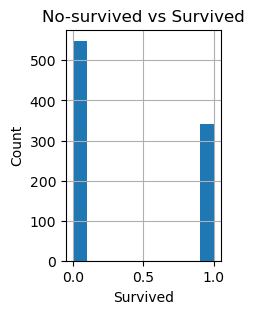

In [8]:
# x軸とy軸のラベルをつける
# ラベルの設定は前述までのhistの引数による設定ではなく、一度グラフオブジェクトを変数に格納し、set_xlabelおよびset_ylabelで設定する
fig = train["Survived"].plot.hist(figsize =(2,3), title="No-survived vs Survived", grid=True)
fig.set_xlabel("Survived")
fig.set_ylabel("Count")

Text(0, 0.5, 'Count')

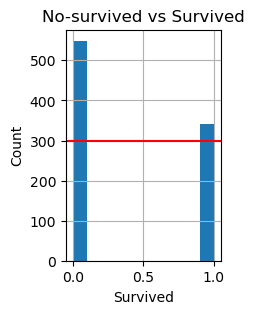

In [9]:
# y=300の位置に赤ラインを引く
plt.axhline(y=300, color="red")
fig = train["Survived"].plot.hist(figsize =(2,3), title="No-survived vs Survived", grid=True)
fig.set_xlabel("Survived")
fig.set_ylabel("Count")

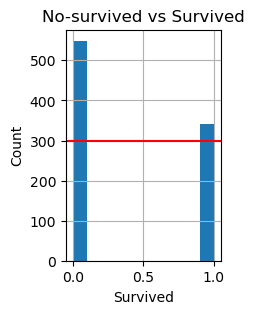

In [10]:
# 画像をpng形式で保存する
plt.axhline(y=300, color="red")
fig = train["Survived"].plot.hist(figsize =(2,3), title="No-survived vs Survived", grid=True)
fig.set_xlabel("Survived")
fig.set_ylabel("Count")
plt.savefig("sample_fig.png")

### 箱ひげ図の描画

<Axes: title={'center': 'Age'}, xlabel='[Sex]'>

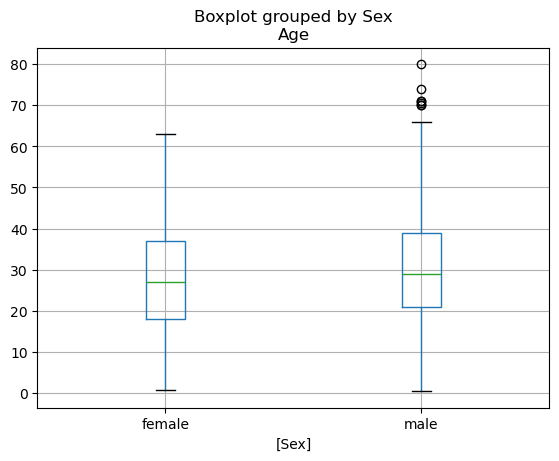

In [11]:
# 性別をx軸にし、男性・女性それぞれの年齢分布を箱ひげ図で表現
train[["Sex","Age"]].boxplot(by="Sex")

### 他にも
- ここで扱ったヒストグラムや箱ひげ図以外にもデータの可視化方法はたくさんあります
- matplotlibにはあらゆる可視化方法が用意されているので、興味がある場合は公式Referenceを見てみましょう。どのようなコードを書けばいいのかサンプルも豊富です
- https://matplotlib.org/stable/gallery/index.html  
<img src="matplotlib.png">

## ■練習問題

1. 横軸をSurvived（生死フラグ）、縦軸をFare（チケット料金）として箱ひげ図を書いてください

<Axes: title={'center': 'Fare'}, xlabel='[Survived]'>

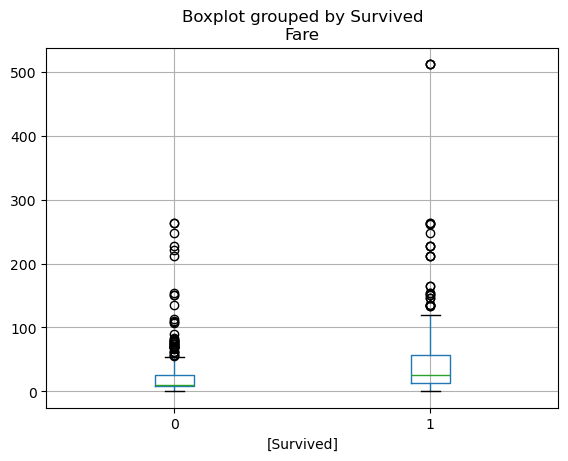

In [13]:
train[["Survived","Fare"]].boxplot(by="Survived")

2. 上記の箱ひげ図に対し、下記のように装飾してください
- 横軸ラベルに"Survived"を設定
- 縦軸ラベルに"Fare"を設定

Text(0, 0.5, 'Fare')

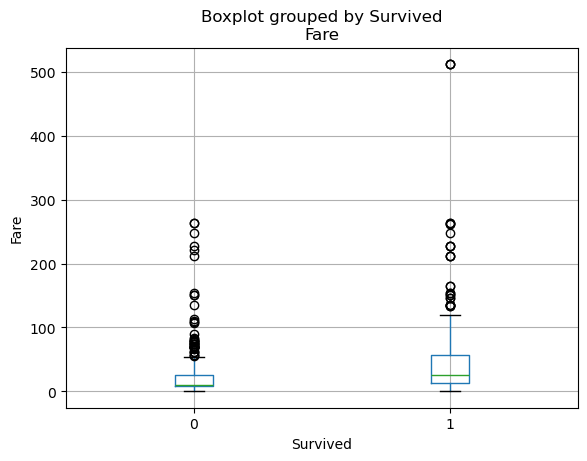

In [14]:
fig = train[["Survived","Fare"]].boxplot(by="Survived")
fig.set_xlabel("Survived")
fig.set_ylabel("Fare")